# RQ2 : analisi statement

### Importo le librerie che mi serviranno

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

### Setup dati

In [115]:
# cartella dove ci sono i dati da analizzare
folder = "../../setup_dati/"

carico i vari dataframe

In [116]:

# dataframe totale

df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)


In [117]:
# dataframe sovra_categorie
'''
df_true = pd.read_csv(folder+"df_true.csv", sep=',').drop(columns=['Unnamed: 0'])
df_false = pd.read_csv(folder+"df_false.csv", sep=',').drop(columns=['Unnamed: 0'])
'''

'\ndf_true = pd.read_csv(folder+"df_true.csv", sep=\',\').drop(columns=[\'Unnamed: 0\'])\ndf_false = pd.read_csv(folder+"df_false.csv", sep=\',\').drop(columns=[\'Unnamed: 0\'])\n'

In [118]:
# dataframe sotto_categorie
'''
df_wrong_false = df_all[df_all["quartile"] == "wrong_false"]
df_correct_false = df_all[df_all["quartile"] == "correct_false"]
df_wrong_true = df_all[df_all["quartile"] == "wrong_true"]
df_correct_true = df_all[df_all["quartile"] == "correct_true"]
'''

'\ndf_wrong_false = df_all[df_all["quartile"] == "wrong_false"]\ndf_correct_false = df_all[df_all["quartile"] == "correct_false"]\ndf_wrong_true = df_all[df_all["quartile"] == "wrong_true"]\ndf_correct_true = df_all[df_all["quartile"] == "correct_true"]\n'

## Funzioni che mi serviranno 

### Funzione per visualizzare il dataframe

In [119]:
colonne_da_NON_visualizzare = ['unit_id','worker_id', 'paid', 'batch_name', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_fact_check_source',
       'doc_speaker_name', 
       'doc_statement_description', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_label', 'doc_unbiasedness_index',
       'doc_unbiasedness_description', 'doc_accuracy_value',
       'doc_accuracy_label', 'doc_accuracy_index', 'doc_accuracy_description',
       "doc_speaker's-trustworthiness_value",
       "doc_speaker's-trustworthiness_label",
       "doc_speaker's-trustworthiness_index",
       "doc_speaker's-trustworthiness_description", 'doc_truthfulness_value',
       'doc_truthfulness_label', 'doc_truthfulness_index',
       'doc_truthfulness_description', 'doc_confidence_value',
       'doc_confidence_label', 'doc_confidence_index',
       'doc_confidence_description', 'doc_accesses', 'doc_time_elapsed',
       'doc_time_start', 'doc_time_end', 'global_outcome',
       'global_form_validity', 'gold_checks', 'time_spent_check',
       'time_check_amount',"task_id"]


def visualizza_dataframe(df=df_all,n=10):
       display(df.drop(colonne_da_NON_visualizzare, axis=1).head(n))

funzioni per avere solo true e false

In [120]:
def visualizza_dataframe_true(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_false(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="pants-on-fire"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

In [121]:
def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_true(df=df_all,n=10):
       display(df[df["quartile"]=="correct_true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))
       
def visualizza_dataframe_wrong_false(df=df_all,n=10):
       display(df[df["quartile"]=="wrong_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

### Funzioni per il test di significatività

     test di Mann-Whitney u
     
Il test di Mann-Whitney U è un test non parametrico utilizzato per confrontare due campioni indipendenti e stabilire se esiste una differenza significativa tra di essi. In particolare, il test viene utilizzato per verificare se le mediane dei due campioni sono significativamente diverse.

In [122]:
from scipy.stats import mannwhitneyu

In [123]:
# group1 e group2 sono due liste di valori
# ritorna p-value => se p-value < 0.05 allora la mediana è significativamente diversa

def test_mann_whitney_u(group1,group2):
    stat, p = mannwhitneyu(group1, group2)
    return p

    prop test => test di differenza tra due porzioni
Valuta se delle proporzioni sono uguali (p1 = p2 = p3 = .. pk) => ipotesi nulla o se esite una proporzioni significativamente diversa salle altre (ipotesi alternativa) 

In [124]:
import statsmodels.stats.proportion as ssp

In [125]:
# si applica a una specifica dimensione e si passa in input le frequenze assolute di ogni valore della dimensione

# count = particolare (wt/wf/mt/mf)
# nobs = totale di riferimento (true / false)
# ritorna p-value => se p-value < 0.05 allora c'è una proporzione significativamente diversa

def prop_test(count,nobs):
    (chi2, p, arr) = ssp.proportions_chisquare(count,nobs)
    return p

In [126]:
def prop_test_all(count,nobs):
    test_results  = ssp.proportions_chisquare_allpairs(count, nobs, multitest_method='b')
    return test_results 

    p trend test => test 
permette di verificare la presenza di una tendenza lineare tra le proporzioni(l’ipotesi nulla è che non vi sia alcuna tendenza tra di esse; l’alternativa è che vi sia un aumento/decremento lineare della proporzione man mano che si sale/scende nelle categorie. Questo test è da eseguire solo se la variabile categoriale considerata è ordinale.)

In [127]:
from scipy.stats import pearsonr

In [128]:
# tred test

def tred_test(count,nobs):
    corr, pval = corr, pval = pearsonr(count,nobs)
    return pval

### Funzioni per plot di grafici

In [129]:
# imposto dimensione delle figure e stile
custom_params = {"axes.spines.right": False, "axes.spines.top": False,'figure.figsize':(4.7,3.27)}
sns.set_theme(style="ticks", rc=custom_params)


    funzione per generare strip plot (solo puntini) con:
- y = mean della correttezza
- x = quartili
- colori = valori di una dimensione (considerata)

In [130]:
# df_sovra = True o False
# dimensione = dimensione considerata

def plot_strip_plot(df, dimensione, x_value, x_filter = None, y_value = "mean", valori_dimensione = None, order = None):
   
    if order == None:
       order = list(df[x_value].unique())
    
    if valori_dimensione is not None:
        
        tutti = df[dimensione].unique()
        da_tenere = []
        for val in tutti:
            if val not in valori_dimensione:
                da_tenere.append(val) 
                
        for val in da_tenere:
            df = df.loc[df[dimensione] != val]
    
    
    if x_filter is not None:
        diff = order.copy()
        for val in x_filter:
            
            diff.remove(val)
        for val in diff:
            df = df.loc[df[x_value] != val]
            order.remove(val)
    
    ax = sns.stripplot(y=y_value, x=x_value, data=df, hue=dimensione ,jitter=0.1, size=8, order=order, palette="Set2")
    # show the graph
    plt.title(dimensione+" "+x_value, loc="center")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.tick_params(axis='x', rotation=60)
    plt.show()

    funzione per generare un boxplot + stripplot di una dimensione di interesse:
- y = dimensione di interesse
- x = quartitli (wt,wf,ct,wt)

In [131]:
def plot_boxplot(df, dimensione):

    ax = sns.boxplot(palette = "deep",x="quartile", y=dimensione, data=df,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
    
    ax = sns.stripplot(palette = ["black"],x="quartile", y=dimensione, data=df, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

    # add title
    plt.title("title", loc="left")
    # show the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

    funzione per creare barplot di confronto

In [132]:

from matplotlib.colors import to_rgba

def crea_barplot(raccoglitore_dimensioni,dimensione,ordine_personalizzato = None):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

    fig.tight_layout(pad=5.0)
    
    for quartile in quartili:
        
        sub = raccoglitore_dimensioni[dimensione][quartile].sort_values("valore", ascending=False)
        sub_freq_rel = []
        for index, row in sub.iterrows():
            for col in ["freq_rel_quartile", "freq_rel_sovra", "freq_rel_all"]:
                new_row = [row["valore"],col, sub.at[index,col]]
                sub_freq_rel.append(new_row)

        sub_freq_rel = pd.DataFrame(sub_freq_rel, columns=["valore", "colonna", "frequenza"])
        sub_freq_rel = sub_freq_rel.sort_values(by=["valore"], ascending=True)
        
        if quartile == "wrong_false":
            i = 0
            j = 0
        elif quartile == "wrong_true":
            i = 0
            j = 1
        elif quartile == "correct_false":
            i = 1
            j = 0
        elif quartile == "correct_true":
            i = 1
            j = 1
            
        '''    
        color_dict = {'freq_rel_quartile': to_rgba('cornflowerblue', 1),
                    'freq_rel_sovra': to_rgba('grey', 0.2),
                    'freq_rel_all': to_rgba('magenta', 0.2)}   
        ''' 
        sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", hue ="colonna", orient="v", ax=ax[i,j], palette=["g","indianred", "goldenrod"])   
        
        aplha_value = 0.35
        
        for bar, alpha in zip(ax[i,j].containers[2], list(aplha_value*np.ones(len(sub_freq_rel["valore"])))):
            bar.set_alpha(alpha)
        for bar, alpha in zip(ax[i,j].containers[0], list(aplha_value*np.ones(len(sub_freq_rel["valore"])))):
            bar.set_alpha(alpha)
        
        ax[i,j].set_title(quartile)
    
    # sistemo legende
    for i in range(2):
        for j in range(2):
            if i == 1 and j == 1:
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
            else:
                ax[i,j].get_legend().remove()
        
    
    
    plt.show()

     funzione per creare box plot + stripplot

In [133]:
def crea_boxplot_e_stripplot(df, x_dimensione, y_dimensione, order = ['wrong_false','other_false','correct_false', 'wrong_true','other_true','correct_true']):

    ax = sns.boxplot(palette = "pastel",x=x_dimensione, y=y_dimensione, data=df_all_dropped,order = order)
    
    ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)

    # add title
    plt.title("title", loc="left")
    ax.tick_params(axis='x', rotation=90)
    # show the graph
    plt.show()

### Funzioni di supporto

Funzione per determinare frequenza assoluta

    Funzione per determinare la frequenza assoluta
- data una dimensione da analizzare
- dato il valore di interesse

calcola la frequenza assoluta del valore rispetto al totale --> numero di occorrenze di un valore nel df

In [134]:
def calcola_frequenza_assoluta(df, dimensione, valore_dimensione, sovra_categoria):
        if sovra_categoria == 'all':
                sub = df
                #sub = df.drop_duplicates(subset=['doc_id'])
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        else:
                sub = df[df['quartile'] == sovra_categoria]
                #sub = sub.drop_duplicates(subset=['doc_id'])
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        

    Funzione per aggiungere un valore a una determinata colonna di una determinata riga di un dataframe 

In [135]:
# scorro df ipotizzando che il valore di doc_id sia unico

def aggiungi_valore(df,colonna,valore,doc_id):
    df.loc[df['doc_id'] == doc_id, colonna] = valore
    return df

    Ordina tabella secondo una dimensione

In [136]:
def ordina_tabella(df,dimensione,ordine):
    df = df.sort_values(by=[dimensione], ascending=ordine)
    return df

    voglio una tabella che mi dica per ogni valore considerato di una dimensione:
- frequenza assoluta del valore nella sotto categoria
- frequenza assoluta del valore nella sovra categoria
- frequenza assoluta del valore in generale (tutto)

df => df_all

In [137]:
def crea_subDF_con_frequenze(df, sovra_categoria, quartile, dimensione):
    res_assolute = []
    res_relative = []
    for valore_dimensione in df[dimensione].unique():
        freq_ass_all = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, "all")
        freq_ass_sovra = calcola_frequenza_assoluta(df[df["doc_fact_check_ground_truth_label"] == sovra_categoria], dimensione, valore_dimensione, "all")
        freq_ass_quartile = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, quartile)
        res_assolute.append([valore_dimensione,freq_ass_all,freq_ass_sovra,freq_ass_quartile])  
    
    res_assolute = pd.DataFrame(res_assolute, columns=["valore", "freq_ass_all", "freq_ass_sovra", "freq_ass_quartile"])     
    
    res_relative = []
    for col in res_assolute.columns[1:]:
        
        tot = res_assolute[col].sum()
        colonna = []
        for val in res_assolute[col]:
            colonna.append(val/tot)    
        res_relative.append(colonna)
            
    res_relative = pd.DataFrame(res_relative).T
    res_relative.columns = ["freq_rel_all", "freq_rel_sovra", "freq_rel_quartile"]

    sub = pd.concat([res_assolute, res_relative], axis=1, join='inner')
    return ordina_tabella(sub,"valore",True)

In [138]:
crea_subDF_con_frequenze(df_all, "pants-on-fire", "wrong_false", "doc_index")

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,0.0,153,30,8,0.127606,0.150754,0.16
6,1.0,146,20,7,0.121768,0.100503,0.14
3,2.0,143,19,4,0.119266,0.095477,0.08
4,3.0,154,27,5,0.128440,0.135678,0.10
7,4.0,149,21,3,0.124270,0.105528,0.06
5,5.0,152,32,11,0.126772,0.160804,0.22
0,6.0,150,23,7,0.125104,0.115578,0.14
1,7.0,152,27,5,0.126772,0.135678,0.10


    aggiungi roba al df all

In [139]:
# unisci due df tramite colonna_uguale

def aggiungi_colonna(df_totale,df_secondario, colonna,colonna_uguale_primo, colonna_uguale_secondario):
    df_totale[str(colonna)] = 1

    for index, row in df_totale.iterrows():
        id = row[str(colonna_uguale_primo)]
        df_totale.at[index,str(colonna)] = df_secondario[df_secondario[str(colonna_uguale_secondario)] == id][str(colonna)].values[0]

# Analisi

Poichè sto analizzando gli statement e nel dataset df_all ho tante occorrenze dello stesso (pocihè ognuno è stato valutato da 10 worker diversi) tengo 1 occorrenza di ciascuno

In [140]:
df_all_dropped = df_all.drop_duplicates(subset=["doc_id"])

Fisso le dimensioni che voglio analizzare

In [141]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"]

quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

### Sistemo dati

Verifico quanti valori ci sono per ogni variabile

In [142]:
for dimensione in dimensioni_da_analizzare:
    print(dimensione, len(df_all_dropped[dimensione].unique()))

doc_index 8
doc_speaker_party 2
doc_statement_date 66


Notiamo che per la data ce ne sono tanti => proviamo a ridurli

In [143]:
df_all_dropped["doc_statement_date"].unique()

array(['2022-03-15', '2022-06-13', '2022-04-04', '2022-05-27',
       '2022-07-13', '2022-07-16', '2022-04-29', '2022-07-14',
       '2022-06-26', '2022-05-28', '2022-01-04', '2022-07-17',
       '2022-06-28', '2022-07-05', '2022-07-09', '2022-05-24',
       '2022-05-10', '2022-12-19', '2022-02-05', '2022-05-03',
       '2022-06-24', '2022-04-14', '2022-06-09', '2022-03-25',
       '2022-10-15', '2022-06-02', '2022-07-06', '2022-02-19',
       '2022-05-02', '2022-02-09', '2022-06-14', '2022-12-14',
       '2022-07-12', '2022-10-14', '2022-06-17', '2022-06-15',
       '2022-05-16', '2022-06-16', '2022-06-05', '2022-05-25',
       '2022-03-24', '2022-03-14', '2022-04-11', '2022-04-12',
       '2022-11-14', '2022-09-15', '2022-07-21', '2022-07-01',
       '2022-03-07', '2022-05-11', '2022-06-30', '2022-04-19',
       '2022-04-28', '2022-03-22', '2022-06-29', '2022-04-23',
       '2022-05-13', '2022-04-24', '2022-05-21', '2022-05-08',
       '2022-02-01', '2022-04-05', '2022-05-04', '2022-

Notiamo che sono:
- tutti del 2022
- di mesi diversi
=> decido di raggrupparli per mese => in questo modo da 66 possibili valori passo a 12

In [144]:
for index, row in df_all.iterrows():
    mese = row["doc_statement_date"]
    mese = str(mese[5:7])
    df_all.at[index,"doc_statement_date"] = mese

In [145]:
df_all_dropped["doc_statement_date"].unique()

array(['2022-03-15', '2022-06-13', '2022-04-04', '2022-05-27',
       '2022-07-13', '2022-07-16', '2022-04-29', '2022-07-14',
       '2022-06-26', '2022-05-28', '2022-01-04', '2022-07-17',
       '2022-06-28', '2022-07-05', '2022-07-09', '2022-05-24',
       '2022-05-10', '2022-12-19', '2022-02-05', '2022-05-03',
       '2022-06-24', '2022-04-14', '2022-06-09', '2022-03-25',
       '2022-10-15', '2022-06-02', '2022-07-06', '2022-02-19',
       '2022-05-02', '2022-02-09', '2022-06-14', '2022-12-14',
       '2022-07-12', '2022-10-14', '2022-06-17', '2022-06-15',
       '2022-05-16', '2022-06-16', '2022-06-05', '2022-05-25',
       '2022-03-24', '2022-03-14', '2022-04-11', '2022-04-12',
       '2022-11-14', '2022-09-15', '2022-07-21', '2022-07-01',
       '2022-03-07', '2022-05-11', '2022-06-30', '2022-04-19',
       '2022-04-28', '2022-03-22', '2022-06-29', '2022-04-23',
       '2022-05-13', '2022-04-24', '2022-05-21', '2022-05-08',
       '2022-02-01', '2022-04-05', '2022-05-04', '2022-

Per ogni dimensione specificata prima voglio e per ogni quartile voglio vedere come i valori della dimensione variano

In [146]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        #raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_all_dropped, sovra, quartile, dimensione)
        raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_all, sovra, quartile, dimensione)

In [147]:
# esempio
raccoglitore_dimensioni["doc_speaker_party"]["wrong_true"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
0,DEM,650,120,0,0.542118,0.6,0.0
1,REP,549,80,50,0.457882,0.4,1.0


Per ogni dimensione e per ogni specifico quartile valuto il p-value:
- pvalue_quartile_all => se < 0.05 le proporzioni del quartile sono significativamente diverse dal totale (True + False + Other)
- pvalue_quartile_sovra => se < 0.05 le proporzioni del quartile sono significativamente diverse dal sovra (True o False)
- pvalue_sovra_all => se < 0.05 le proporzioni del sovra (True o False) sono significativamente diverse dal totale (True + False + Other)

        Viene quindi effettuato un prop test per ogni dimensione su tutti vari quartili => test di differenza tra due porzioni
        Valuta se delle proporzioni sono uguali (p1 = p2 = p3 = .. pk) => ipotesi nulla o se esite una proporzioni significativamente diversa salle altre (ipotesi alternativa) 

In [148]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])

    esempio

In [149]:
raccoglitore_pvalue["doc_statement_date"]["correct_true"]

,pvalue_quartile_all,pvalue_quartile_sovra,pvalue_sovra_all
0,1.621898e-14,1.730475e-07,5.681995e-40


Poichè mi interessano solo i p-value < 0.05 faccio un filtro e creo un nuovo df che contiene solo i significativi

In [150]:
significativi = []
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        for val in raccoglitore_pvalue[dimensione][quartile]:
            if raccoglitore_pvalue[dimensione][quartile][val][0] < 0.05:
                row = [dimensione, quartile, val, raccoglitore_pvalue[dimensione][quartile][val][0]]
                significativi.append(row)
significativi = pd.DataFrame(significativi, columns=["dimensione", "quartile", "confronto", "valore_pvalue"])
significativi.sort_values(by=["valore_pvalue"], ascending=True)

,dimensione,quartile,confronto,valore_pvalue
12,doc_statement_date,wrong_false,pvalue_sovra_all,1.987466e-106
15,doc_statement_date,correct_false,pvalue_sovra_all,1.987466e-106
16,doc_statement_date,wrong_true,pvalue_quartile_all,6.314338e-54
13,doc_statement_date,correct_false,pvalue_quartile_all,4.509395e-52
21,doc_statement_date,correct_true,pvalue_sovra_all,5.681995e-40
18,doc_statement_date,wrong_true,pvalue_sovra_all,5.681995e-40
7,doc_speaker_party,wrong_true,pvalue_quartile_sovra,1.523971e-23
14,doc_statement_date,correct_false,pvalue_quartile_sovra,1.533800e-17
17,doc_statement_date,wrong_true,pvalue_quartile_sovra,3.029598e-15
6,doc_speaker_party,wrong_true,pvalue_quartile_all,3.851037e-15


In [151]:
#significativi = significativi.drop_duplicates(subset=["dimensione", "quartile"])
#significativi

## Visualizzo i risultati

In [152]:
# definisco un ordine per la visualizzazione dei quartili
ordine = ["wrong_false", "other_false","correct_false","other","wrong_true", "other_true","correct_true"]

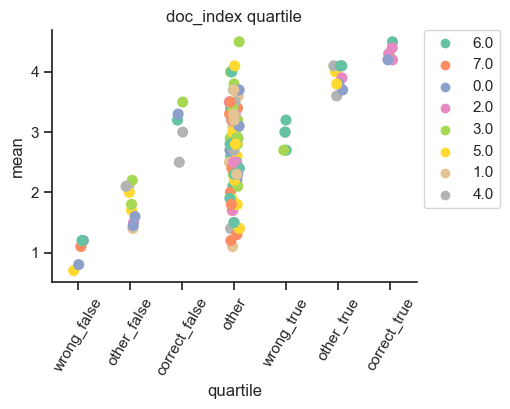

In [153]:
# test per strip plot
plot_strip_plot(df_all_dropped, "doc_index", "quartile",order = ordine)

### DIMENSIONE: doc_speaker_party

In [154]:
dimensione = "doc_speaker_party"

In [155]:
significativi[significativi["dimensione"] == dimensione]

,dimensione,quartile,confronto,valore_pvalue
2,doc_speaker_party,wrong_false,pvalue_quartile_all,7.046953e-07
3,doc_speaker_party,wrong_false,pvalue_sovra_all,8.664752e-14
4,doc_speaker_party,correct_false,pvalue_quartile_sovra,1.065244e-07
5,doc_speaker_party,correct_false,pvalue_sovra_all,8.664752e-14
6,doc_speaker_party,wrong_true,pvalue_quartile_all,3.851037e-15
7,doc_speaker_party,wrong_true,pvalue_quartile_sovra,1.523971e-23
8,doc_speaker_party,correct_true,pvalue_quartile_all,2.796130e-13
9,doc_speaker_party,correct_true,pvalue_quartile_sovra,4.052771e-14


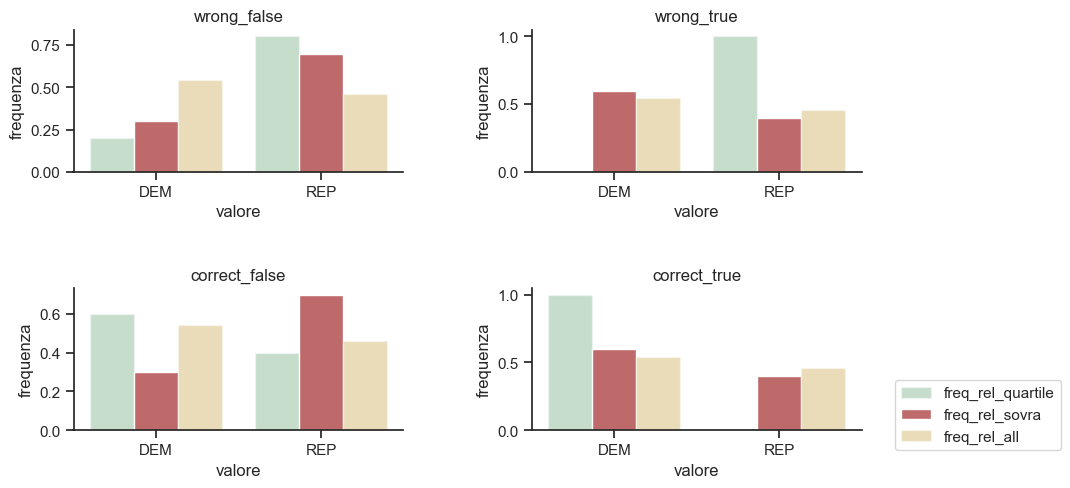

In [156]:
crea_barplot(raccoglitore_dimensioni, dimensione)

### Dimensione : doc_statement_date

In [157]:
dimensione = "doc_statement_date"
significativi[significativi["dimensione"] == dimensione]

,dimensione,quartile,confronto,valore_pvalue
10,doc_statement_date,wrong_false,pvalue_quartile_all,3.245712e-09
11,doc_statement_date,wrong_false,pvalue_quartile_sovra,2.696665e-13
12,doc_statement_date,wrong_false,pvalue_sovra_all,1.987466e-106
13,doc_statement_date,correct_false,pvalue_quartile_all,4.509395e-52
14,doc_statement_date,correct_false,pvalue_quartile_sovra,1.533800e-17
15,doc_statement_date,correct_false,pvalue_sovra_all,1.987466e-106
16,doc_statement_date,wrong_true,pvalue_quartile_all,6.314338e-54
17,doc_statement_date,wrong_true,pvalue_quartile_sovra,3.029598e-15
18,doc_statement_date,wrong_true,pvalue_sovra_all,5.681995e-40
19,doc_statement_date,correct_true,pvalue_quartile_all,1.621898e-14


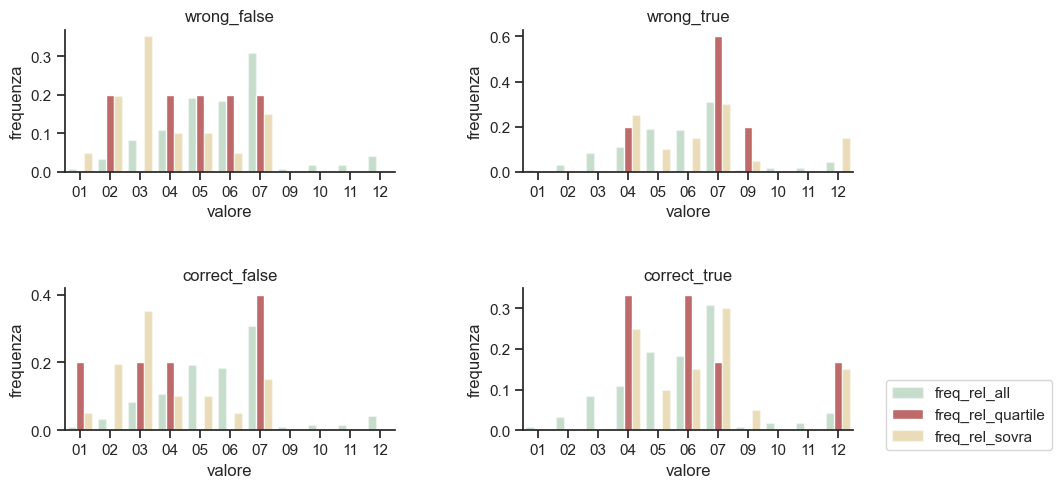

In [158]:
crea_barplot(raccoglitore_dimensioni, dimensione)

### dimensione doc_index

In [159]:
dimensione = "doc_index"
significativi[significativi["dimensione"] == dimensione]

,dimensione,quartile,confronto,valore_pvalue
0,doc_index,wrong_true,pvalue_sovra_all,0.038563
1,doc_index,correct_true,pvalue_sovra_all,0.038563


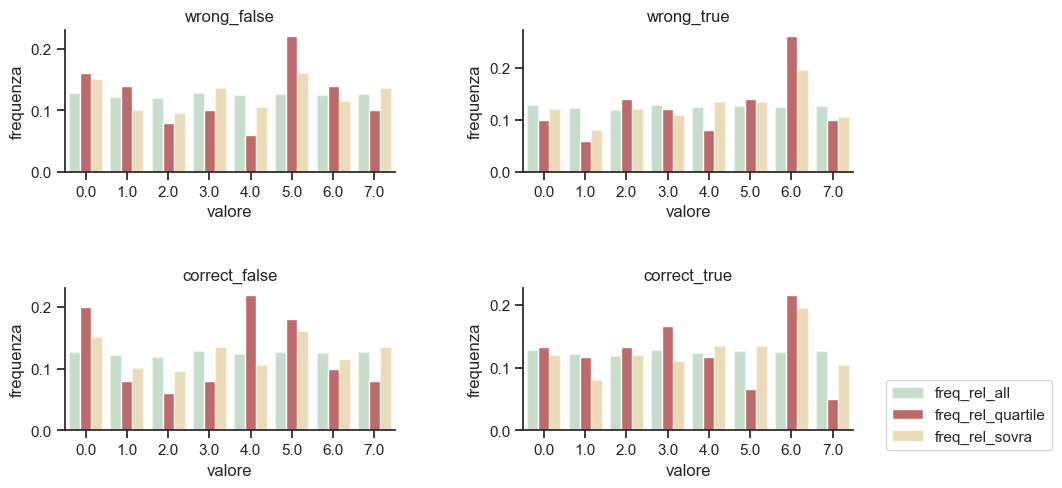

In [160]:
crea_barplot(raccoglitore_dimensioni, dimensione)

## Analisi del linguaggio naturale

Funzione per il test di mann

In [49]:
def calcola_test_mann(df, col):
    for quartile in quartili:
        
        count = df[df["quartile"] == quartile][col]
        group1 = df[df["quartile"] == quartile]["quartile"].unique()
               
        if quartile == "correct_true" or quartile == "wrong_true":
            sovra = "true"
        else:
            sovra = "pants-on-fire"
        
        group2 = df_all_dropped[(df_all_dropped["sovra"] == sovra) & (df_all_dropped["quartile"] != quartile)]["quartile"].unique()
        nobs = df_all_dropped[(df_all_dropped["sovra"] == sovra) & (df_all_dropped["quartile"] != quartile)][col]
        
        print(group1,group2,test_mann_whitney_u(count,nobs))

### Distribuzione del numero di parole significative

    parole significative = parole che non sono stop word
    dizionario = inglese

In [50]:
import nltk
from nltk.corpus import stopwords

In [51]:
df_all_dropped["numero_parole_frase"] = 0
df_all_dropped["numero_parole_significative"] = 0
df_all_dropped["percentuale_parole_significative"] = 0

for frase in df_all_dropped["doc_statement_text"]:
    # Separa la frase in parole
    parole = frase.split()
    # Rimuovi le stopwords inglesi
    stopwords_eng = stopwords.words('english')
    parole_significative = [parola for parola in parole if parola.lower() not in stopwords_eng]
    # Calcola il numero di parole significative
    numero_parole_significative = len(parole_significative)
    
    id = df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase, "numero_parole_significative"] = numero_parole_significative
    
    lunghezza_frase = len(parole)
    df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase, "numero_parole_frase"] = lunghezza_frase
    
    df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase, "percentuale_parole_significative"] = numero_parole_significative/lunghezza_frase
    

C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\2422973451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_dropped["numero_parole_frase"] = 0
C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\2422973451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_dropped["numero_parole_significative"] = 0
C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\2422973451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


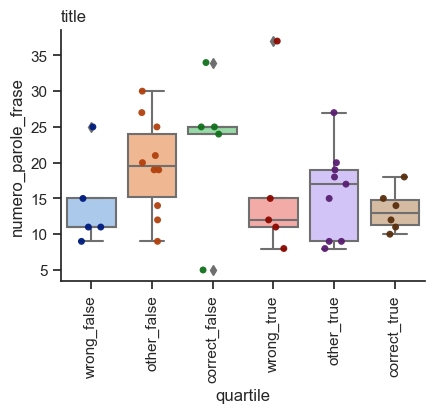

In [52]:
crea_boxplot_e_stripplot(df_all_dropped, "quartile", "numero_parole_frase")

notiamo che gli outliners potrebbero essere tolti

In [53]:
calcola_test_mann(df_all_dropped, "numero_parole_frase")

['wrong_false'] ['correct_false' 'other_false'] 0.13591232518120486
['correct_false'] ['wrong_false' 'other_false'] 0.2925230710554235
['wrong_true'] ['other_true' 'correct_true'] 0.7591904948172747
['correct_true'] ['other_true' 'wrong_true'] 0.6790238901756285


C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


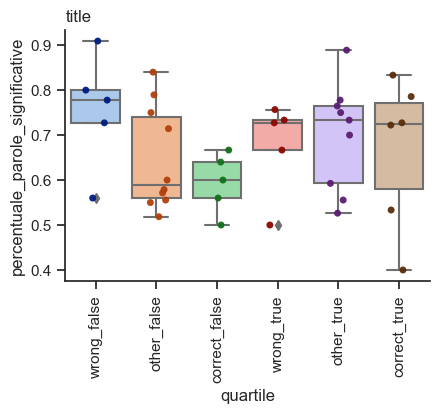

In [54]:
crea_boxplot_e_stripplot(df_all_dropped, "quartile", "percentuale_parole_significative")

In [55]:
calcola_test_mann(df_all_dropped, "percentuale_parole_significative")

['wrong_false'] ['correct_false' 'other_false'] 0.07333605145835306
['correct_false'] ['wrong_false' 'other_false'] 0.2561293786566847
['wrong_true'] ['other_true' 'correct_true'] 0.6622822932247326
['correct_true'] ['other_true' 'wrong_true'] 0.9342167596601569


### Distribuzione della leggibilit`a (FRE)

In [56]:
import textstat

In [57]:
df_all_dropped["fre"] = 0

for frase in df_all_dropped["doc_statement_text"]:
    fre = textstat.flesch_reading_ease(frase)
    
    id = df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase, "fre"] = fre
    

C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\1562355196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_dropped["fre"] = 0


C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


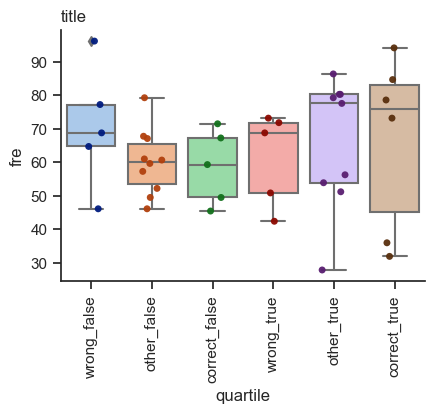

In [58]:
crea_boxplot_e_stripplot(df_all_dropped, "quartile", "fre")

In [59]:
calcola_test_mann(df_all_dropped, "fre")

['wrong_false'] ['correct_false' 'other_false'] 0.17590877328410437
['correct_false'] ['wrong_false' 'other_false'] 0.4848271022156845
['wrong_true'] ['other_true' 'correct_true'] 0.2748723341063948
['correct_true'] ['other_true' 'wrong_true'] 0.6798238825519876


In [60]:
start = 3

i = 3
df_all_dropped["upper_fre"] = 0

df_all_dropped = df_all_dropped.sort_values(by=["fre"], ascending=True)

for index,row in df_all_dropped.iterrows():
    if row["fre"] <= i*10:
      df_all_dropped.at[index,"upper_fre"] = i*10
    else:
      i += 3
      df_all_dropped.at[index,"upper_fre"] = i*10

df_all_dropped[["doc_id","fre","upper_fre"]]

C:\Users\gabri\AppData\Local\Temp\ipykernel_3552\1370792852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_dropped["upper_fre"] = 0


,doc_id,fre,upper_fre
29,democrats-say-david-jolly-david-jolly-supports...,5.15,30
0,joni-ernst-target-describing-11th-hour-obama-r...,12.94,30
76,yes-its-true-cannabis-reform-supported-wiscons...,27.83,30
34,fact-checking-whether-bennie-thompson-objected...,29.52,30
10,yes-tax-break-ron-johnson-pushed-2017-has-bene...,31.89,60
...,...,...,...
118,new-york-state-so-many-bills,94.15,120
204,rpof-chair-lenny-curry-says-rick-scott-cut-sta...,95.67,120
125,joe-biden-said-mass-shootings-tripled-when-ass...,96.18,120
7,ohios-mandel-repeats-false-claim-stolen-2020-e...,96.18,120


### Rapporti tra frequenze relative dei valori del sentimento e soggettività

    sentiment:
    > 0 => positivo
    = 0 => neutro
    < 0 => negativo

    soggettività:
    0 => oggettivo
    1 => soggettivo

In [61]:
from textblob import TextBlob

In [62]:
# aggingo value

df_all_dropped["sentiment"] = 0
df_all_dropped["subjectivity"] = 0

for frase in df_all_dropped["doc_statement_text"]:
    sentiment = TextBlob(frase).sentiment.polarity
    subjectivity = TextBlob(frase).sentiment.subjectivity
    
    id = df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase]["doc_id"].unique()[0]
    df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase, "sentiment"] = sentiment
    df_all_dropped.loc[df_all_dropped["doc_statement_text"] == frase, "subjectivity"] = subjectivity

df_all_dropped["sentiment_label"] = 0
df_all_dropped["subjectivity_label"] = 0


# aggiungo label in base al valore
for index, row in df_all_dropped.iterrows():
    if row["sentiment"] > 0:
        df_all_dropped.loc[index, "sentiment_label"] = "positive"
    elif row["sentiment"] == 0:
        df_all_dropped.loc[index, "sentiment_label"] = "neutral"
    else:
        df_all_dropped.loc[index, "sentiment_label"] = "negative"
        
    if row["subjectivity"] >= 0.80:
        df_all_dropped.loc[index, "subjectivity_label"] = "alta"
    elif row["subjectivity"] >= 0.60:
        df_all_dropped.loc[index, "subjectivity_label"] = "media-alta"
    elif row["subjectivity"] >= 0.40:
        df_all_dropped.loc[index, "subjectivity_label"] = "media"
    elif row["subjectivity"] >= 0.20:
        df_all_dropped.loc[index, "subjectivity_label"] = "media-bassa"
    else:
        df_all_dropped.loc[index, "subjectivity_label"] = "bassa"




In [63]:
df_all_dropped[["doc_id","doc_statement_text",'sentiment',"sentiment_label", 'subjectivity',"subjectivity_label"]]

,doc_id,doc_statement_text,sentiment,sentiment_label,subjectivity,subjectivity_label
29,democrats-say-david-jolly-david-jolly-supports...,"Says David Jolly ""supports privatizing Social ...",0.033333,positive,0.066667,bassa
0,joni-ernst-target-describing-11th-hour-obama-r...,"The Obama administration issued an ""11th-hour ...",0.000000,neutral,0.000000,bassa
76,yes-its-true-cannabis-reform-supported-wiscons...,"Cannabis reform ""is supported by the majority ...",0.000000,neutral,0.000000,bassa
34,fact-checking-whether-bennie-thompson-objected...,âBennie Thompson objected to the 2004 Presid...,0.000000,neutral,0.000000,bassa
10,yes-tax-break-ron-johnson-pushed-2017-has-bene...,"""The tax carve out (Ron) Johnson spearheaded o...",0.125000,positive,0.700000,media-alta
...,...,...,...,...,...,...
118,new-york-state-so-many-bills,"Since taking office, Hochul has passed more th...",0.318182,positive,0.477273,media
204,rpof-chair-lenny-curry-says-rick-scott-cut-sta...,"""Rick Scott has paid down our debt by about $2...",-0.155556,negative,0.288889,media-bassa
125,joe-biden-said-mass-shootings-tripled-when-ass...,"""When we passed the assault weapons ban, mass ...",-0.155556,negative,0.288889,media-bassa
7,ohios-mandel-repeats-false-claim-stolen-2020-e...,The 2020 election âwas stolen from Donald J....,0.000000,neutral,0.000000,bassa


In [64]:
df_all_dropped[['sentiment', 'subjectivity']].describe()

,sentiment,subjectivity
count,120.000000,120.000000
mean,0.054877,0.277850
std,0.156652,0.289824
min,-0.500000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.216667
75%,0.125000,0.477273
max,0.500000,1.000000


In [65]:
dimensioni_da_analizzare = ["sentiment_label", "subjectivity_label"]

In [66]:
ordine_personalizzato = ["bassa","media-bassa","media","media-alta","alta"]

In [67]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni_text = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni_text[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        raccoglitore_dimensioni_text[dimensione][quartile]=crea_subDF_con_frequenze(df_all_dropped, sovra, quartile, dimensione).sort_values("valore",key=lambda x: x.map({v: i for i, v in enumerate(ordine_personalizzato)}))

In [68]:
raccoglitore_dimensioni_text["sentiment_label"]["wrong_false"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,negative,20,4,1,0.166667,0.2,0.2
1,neutral,53,12,4,0.441667,0.6,0.8
0,positive,47,4,0,0.391667,0.2,0.0


In [69]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue_text = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue_text[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni_text[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni_text[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni_text[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue_text[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])

In [70]:
raccoglitore_pvalue_text["sentiment_label"]["wrong_false"]

,pvalue_quartile_all,pvalue_quartile_sovra,pvalue_sovra_all
0,0.165706,0.411112,0.151577


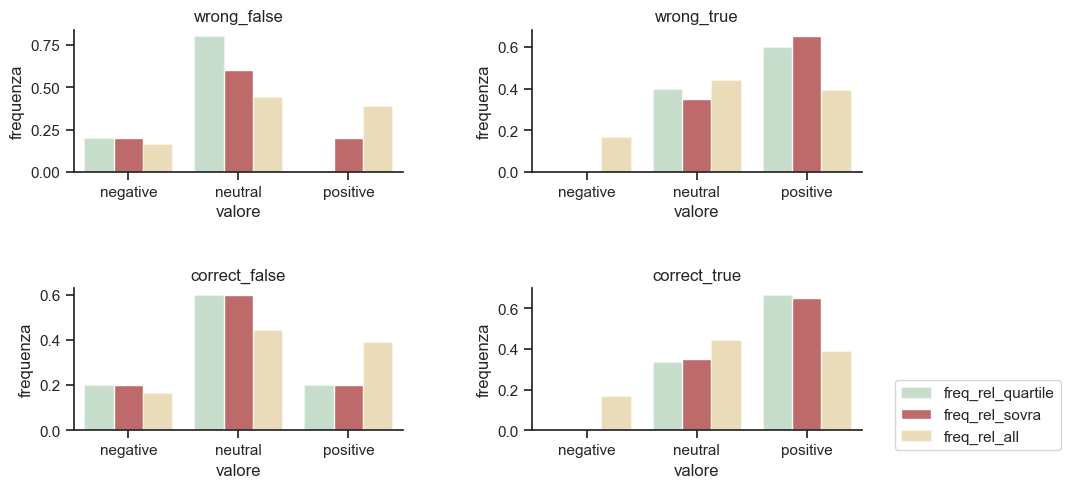

In [71]:
crea_barplot(raccoglitore_dimensioni_text, "sentiment_label")

In [72]:
raccoglitore_dimensioni_text["subjectivity_label"]["correct_false"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
0,bassa,78,13,4,0.410526,0.433333,0.571429
3,media-bassa,23,2,1,0.121053,0.066667,0.142857
4,media,58,7,1,0.305263,0.233333,0.142857
1,media-alta,12,3,0,0.063158,0.100000,0.000000
2,alta,19,5,1,0.100000,0.166667,0.142857


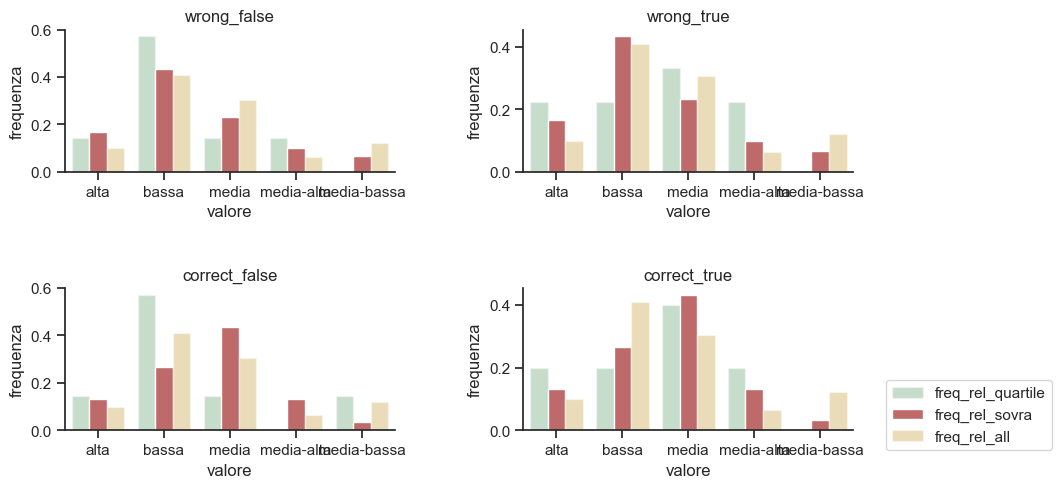

In [72]:
crea_barplot(raccoglitore_dimensioni_text, "subjectivity_label",["bassa","media-bassa","media","media-alta","alta"])

In [73]:

raccoglitore_dimensioni_text["subjectivity_label"]["correct_false"].sort_values("valore",key=lambda x: x.map({v: i for i, v in enumerate(ordine_personalizzato)}))

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
0,bassa,78,8,4,0.410526,0.266667,0.571429
3,media-bassa,23,1,1,0.121053,0.033333,0.142857
4,media,58,13,1,0.305263,0.433333,0.142857
1,media-alta,12,4,0,0.063158,0.133333,0.000000
2,alta,19,4,1,0.100000,0.133333,0.142857


REgressione su trufulness per ogni dimensione considerata

In [74]:
df_all_dropped["doc_truthfulness_label"].unique()

array(['half-true', 'mostly-true', 'barely-true', 'true', 'false', 'lie'],
      dtype=object)

In [75]:
df_all_dropped[["doc_id","doc_fact_check_ground_truth_label","doc_fact_check_ground_truth_value","mean"]]

,doc_id,doc_fact_check_ground_truth_label,doc_fact_check_ground_truth_value,mean
29,democrats-say-david-jolly-david-jolly-supports...,barely-true,2.0,2.9
0,joni-ernst-target-describing-11th-hour-obama-r...,mostly-true,4.0,3.4
76,yes-its-true-cannabis-reform-supported-wiscons...,true,5.0,3.9
34,fact-checking-whether-bennie-thompson-objected...,mostly-true,4.0,4.5
10,yes-tax-break-ron-johnson-pushed-2017-has-bene...,true,5.0,4.3
...,...,...,...,...
118,new-york-state-so-many-bills,true,5.0,4.3
204,rpof-chair-lenny-curry-says-rick-scott-cut-sta...,half-true,3.0,2.8
125,joe-biden-said-mass-shootings-tripled-when-ass...,mostly-true,4.0,3.4
7,ohios-mandel-repeats-false-claim-stolen-2020-e...,pants-on-fire,0.0,1.1


In [76]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment",
                            "subjectivity",
                            "numero_parole_frase"
                            ]

In [77]:
type(df_all_dropped["doc_index"][0])

str

In [78]:
df_all_dropped[["mean","doc_index"]]

,mean,doc_index
29,2.9,5.0
0,3.4,6.0
76,3.9,2.0
34,4.5,3.0
10,4.3,3.0
...,...,...
118,4.3,2.0
204,2.8,6.0
125,3.4,3.0
7,1.1,7.0


doc_index
doc_statement_date
numero_parole_significative
fre
sentiment
subjectivity
numero_parole_frase


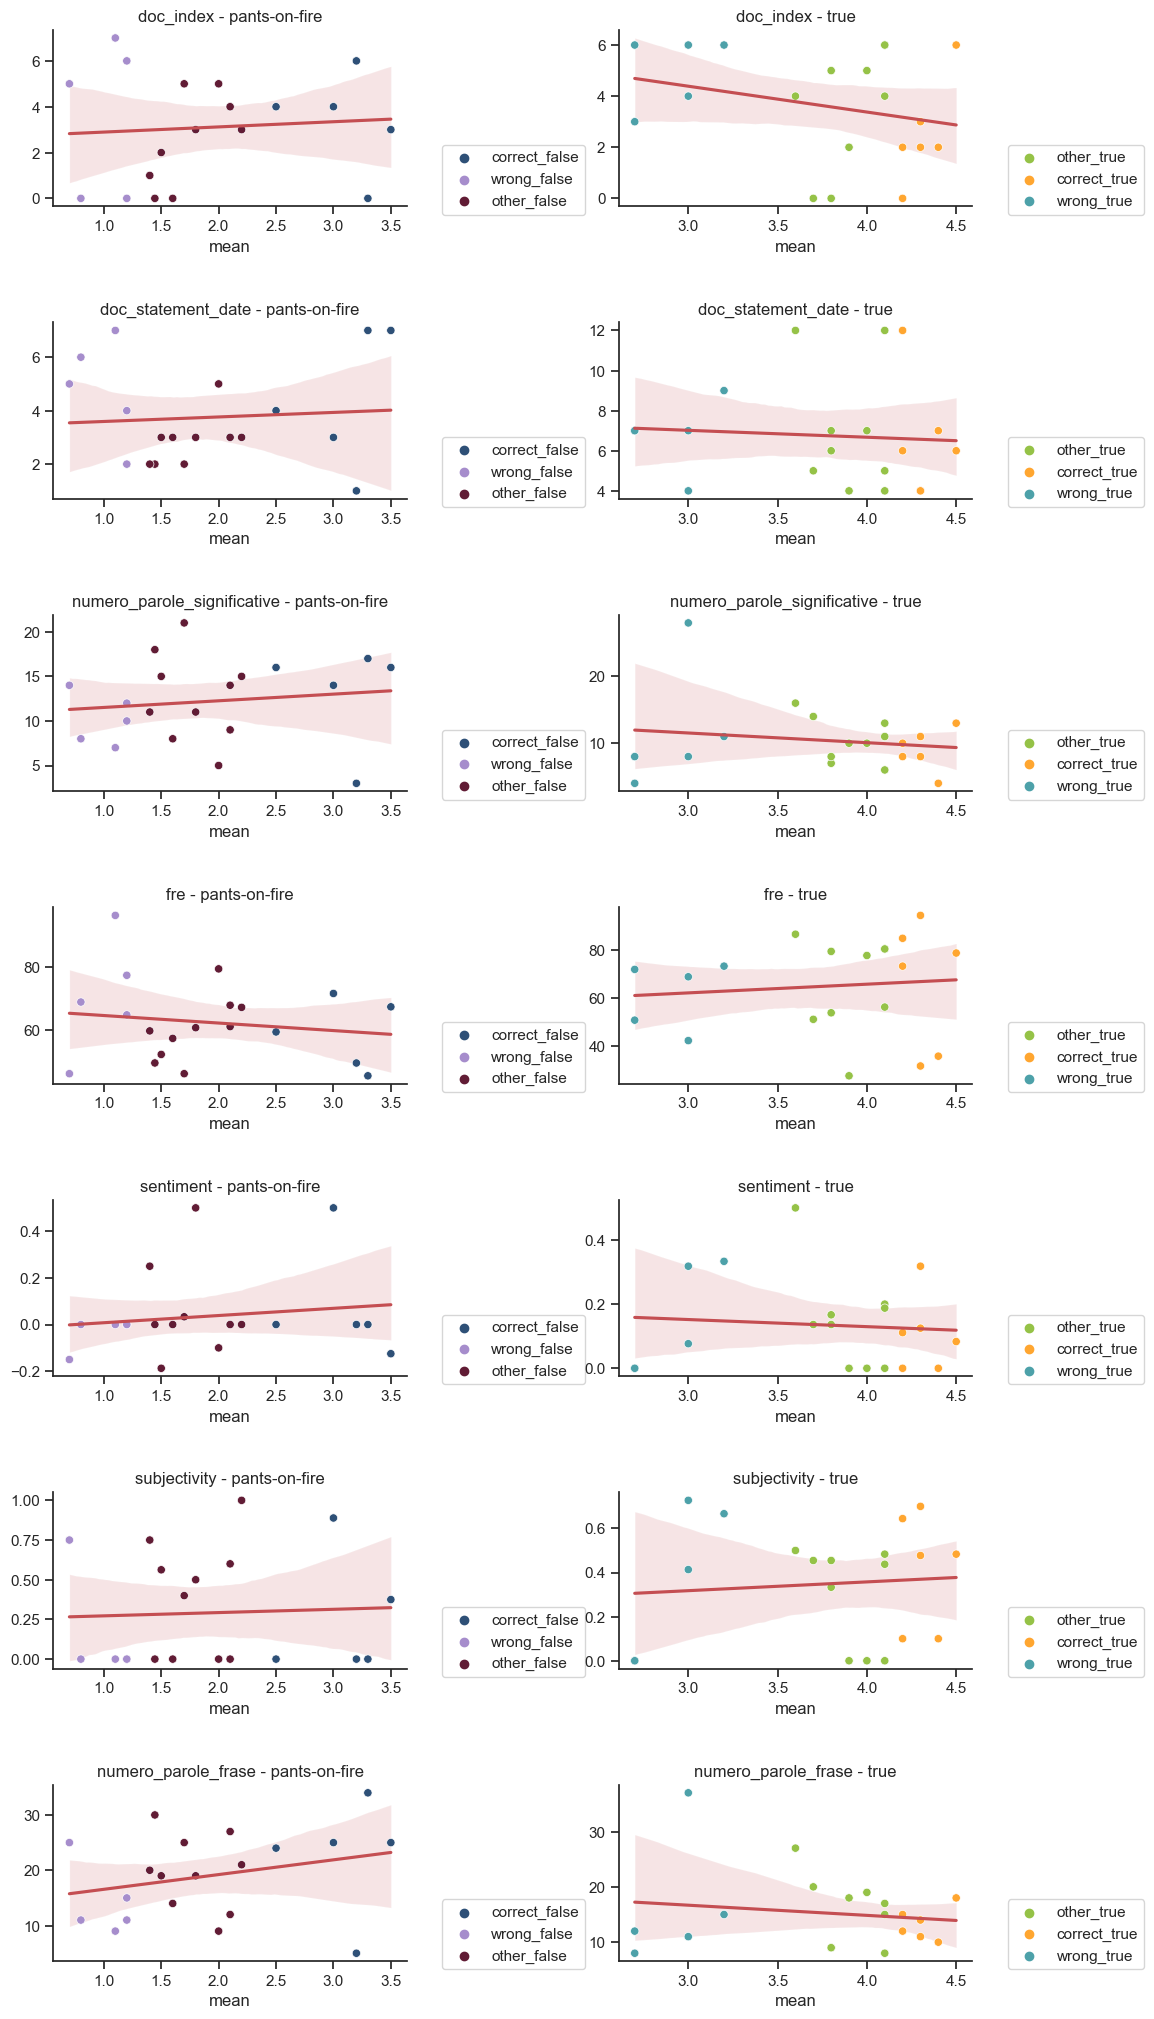

In [79]:
fig, ax = plt.subplots(7,2, figsize=(10,20))

fig.tight_layout(h_pad=5.0, w_pad=10.0)

i = -1

for dimensione in dimensioni_da_analizzare:
        print(dimensione)
        i += 1        
        for sovra in ["pants-on-fire","true"]:
                
                if sovra == "true":
                        j = 1
                else:
                        j = 0
                        
                                
                sub = df_all_dropped[df_all_dropped["doc_fact_check_ground_truth_label"] == sovra]
                
                test = { "correct_true" : "#FFA630",
                        "other_true": "#95C247",
                        "wrong_true": "#4DA1A9",
                        "correct_false" : "#2E5077",
                        "other_false": "#611C35",
                        "wrong_false": "#A68DCC"
                        
                }
                
                sns.regplot(x="mean", 
                                y=np.asarray(sub[dimensione],dtype = np.float64), 
                                data=sub,
                                ax=ax[i,j],
                                scatter_kws={'s':0},
                                color="r"
                                )
                
                sns.scatterplot(x="mean", 
                                y=np.asarray(sub[dimensione],dtype = np.float64), 
                                hue = "quartile",
                                palette=test,
                                data=sub,
                                ax=ax[i,j]
                                )
                ax[i,j].set_title(str(dimensione) + " - " + sovra)
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
           
plt.show()

## Analisi bias

In [80]:
dimensione = "doc_index"

In [81]:
# doc_truthfulness_index

# confronto a sigolo vs tutti altri

dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label",
                            "upper_fre"
                            ]

for dimensione in dimensioni_da_analizzare:
    
    for value in df_all_dropped[dimensione].unique():
        group1 = df_all_dropped[df_all_dropped[dimensione] == value]["doc_truthfulness_index"]
        # tutti
        group2 = df_all_dropped[df_all_dropped[dimensione] != value]["doc_truthfulness_index"]
        p = test_mann_whitney_u(group1,group2)
        if p < 0.05:
            print(dimensione,value,p)


doc_index 1.0 0.041729705810697716
doc_statement_date 10 0.03645100335532514
fre 35.95 0.04457932758323005
fre 59.64 0.03645100335532514
fre 80.28 0.04457932758323005


In [82]:
# doc_truthfulness_index

# confronto a coppie

dimensioni_da_analizzare = ["doc_index", "doc_speaker_party",
                            "doc_statement_date",
                            "numero_parole_significative",
                            "fre",
                            "sentiment_label",
                            "subjectivity_label",
                            "upper_fre"
                            ]

for dimensione in dimensioni_da_analizzare:
    
    for value in df_all_dropped[dimensione].unique():
        group1 = df_all_dropped[df_all_dropped[dimensione] == value]["doc_truthfulness_index"]
        for value2 in df_all_dropped[dimensione].unique():
            if value != value2:
                group2 = df_all_dropped[df_all_dropped[dimensione] == value2]["doc_truthfulness_index"]
                p = test_mann_whitney_u(group1,group2)
                if p < 0.05:
                    print(dimensione,value,value2,p)


doc_index 5.0 1.0 0.04492236536174193
doc_index 4.0 1.0 0.03339682939448364
doc_index 1.0 5.0 0.04492236536174193
doc_index 1.0 4.0 0.03339682939448364
doc_statement_date 03 10 0.03844438776467636
doc_statement_date 04 10 0.04730972548478817
doc_statement_date 05 10 0.03688747801582505
doc_statement_date 10 03 0.03844438776467636
doc_statement_date 10 04 0.04730972548478817
doc_statement_date 10 05 0.03688747801582505
numero_parole_significative 12 24 0.039522648433292354
numero_parole_significative 24 12 0.039522648433292354
upper_fre 60 90 0.04513795337566065
upper_fre 90 60 0.04513795337566065


# analisi parole

In [83]:
sorted(list(df_all_dropped["doc_index"].unique()))

['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0']

C:\Users\gabri\AppData\Local\Temp\ipykernel_18268\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


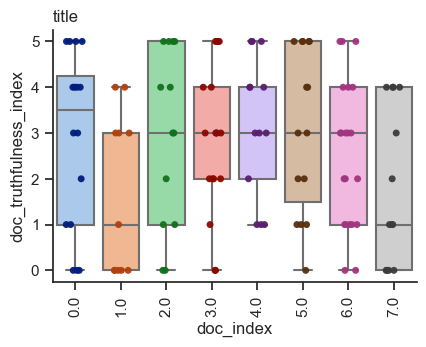

In [84]:
crea_boxplot_e_stripplot(df_all_dropped, "doc_index", "doc_truthfulness_index",order=sorted(list(df_all_dropped["doc_index"].unique())))

C:\Users\gabri\AppData\Local\Temp\ipykernel_18268\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


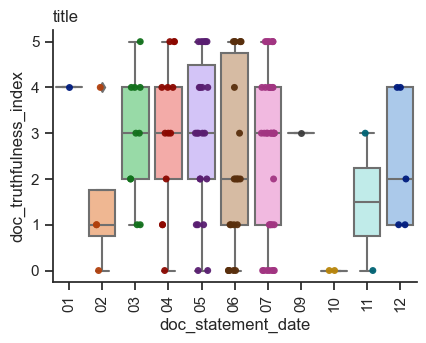

In [85]:
crea_boxplot_e_stripplot(df_all_dropped, "doc_statement_date", "doc_truthfulness_index",order=sorted(list(df_all_dropped["doc_statement_date"].unique())))

C:\Users\gabri\AppData\Local\Temp\ipykernel_18268\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


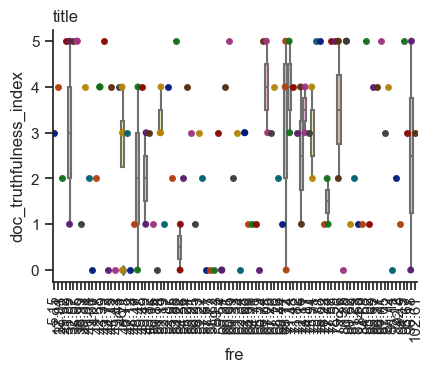

In [86]:
crea_boxplot_e_stripplot(df_all_dropped, "fre", "doc_truthfulness_index",order=sorted(list(df_all_dropped["fre"].unique())))

In [87]:
df_all_dropped = df_all_dropped.sort_values("fre",ascending=True)

In [88]:
df_all_dropped[["doc_id",'fre','upper_fre']]

,doc_id,fre,upper_fre
29,democrats-say-david-jolly-david-jolly-supports...,5.15,30
0,joni-ernst-target-describing-11th-hour-obama-r...,12.94,30
76,yes-its-true-cannabis-reform-supported-wiscons...,27.83,30
34,fact-checking-whether-bennie-thompson-objected...,29.52,30
10,yes-tax-break-ron-johnson-pushed-2017-has-bene...,31.89,60
...,...,...,...
118,new-york-state-so-many-bills,94.15,120
204,rpof-chair-lenny-curry-says-rick-scott-cut-sta...,95.67,120
125,joe-biden-said-mass-shootings-tripled-when-ass...,96.18,120
7,ohios-mandel-repeats-false-claim-stolen-2020-e...,96.18,120


C:\Users\gabri\AppData\Local\Temp\ipykernel_18268\2948740739.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df_all_dropped, jitter=0.2, size=5, order = order, alpha=0.95)


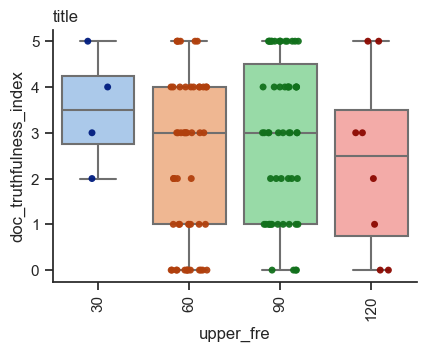

In [89]:
crea_boxplot_e_stripplot(df_all_dropped, "upper_fre", "doc_truthfulness_index",order=sorted(list(df_all_dropped["upper_fre"].unique())))

In [90]:
quartili

['wrong_false', 'correct_false', 'wrong_true', 'correct_true']

In [91]:
testi = df_all_dropped["doc_statement_text"].str.cat(sep=' ')
lista_parole = testi.split() 


In [92]:
lista_parole

['Says',
 'David',
 'Jolly',
 '"supports',
 'privatizing',
 'Social',
 'Security."',
 'The',
 'Obama',
 'administration',
 'issued',
 'an',
 '"11th-hour',
 'rule',
 'that',
 'entrenches',
 'federal',
 'family',
 'planning',
 'funding',
 'for',
 'Planned',
 'Parenthood."',
 'Cannabis',
 'reform',
 '"is',
 'supported',
 'by',
 'the',
 'majority',
 'of',
 'the',
 'residents',
 'of',
 'our',
 'state,',
 'including',
 'a',
 'majority',
 'of',
 'Republicans."',
 'â\x80\x9cBennie',
 'Thompson',
 'objected',
 'to',
 'the',
 '2004',
 'Presidential',
 'election.â\x80\x9d',
 '"The',
 'tax',
 'carve',
 'out',
 '(Ron)',
 'Johnson',
 'spearheaded',
 'overwhelmingly',
 'benefited',
 'the',
 'wealthiest,',
 'over',
 'small',
 'businesses."',
 'Gun',
 'manufacturers',
 'are',
 'â\x80\x9cthe',
 'only',
 'industry',
 'in',
 'the',
 'countryâ\x80\x9d',
 'that',
 'have',
 'immunity',
 'from',
 'lawsuits.',
 'In',
 'the',
 'immediate',
 'wake',
 'of',
 'a',
 'fire',
 'and',
 'vandalism',
 'at',
 'the',
 'Ma

In [93]:
import re

# tolgo cose che non sono lettere

for i in range(len(lista_parole)):
    lista_parole[i] = re.sub(r'[^a-zA-Z]', '', lista_parole[i]) 

lista_parole 

['Says',
 'David',
 'Jolly',
 'supports',
 'privatizing',
 'Social',
 'Security',
 'The',
 'Obama',
 'administration',
 'issued',
 'an',
 'thhour',
 'rule',
 'that',
 'entrenches',
 'federal',
 'family',
 'planning',
 'funding',
 'for',
 'Planned',
 'Parenthood',
 'Cannabis',
 'reform',
 'is',
 'supported',
 'by',
 'the',
 'majority',
 'of',
 'the',
 'residents',
 'of',
 'our',
 'state',
 'including',
 'a',
 'majority',
 'of',
 'Republicans',
 'Bennie',
 'Thompson',
 'objected',
 'to',
 'the',
 '',
 'Presidential',
 'election',
 'The',
 'tax',
 'carve',
 'out',
 'Ron',
 'Johnson',
 'spearheaded',
 'overwhelmingly',
 'benefited',
 'the',
 'wealthiest',
 'over',
 'small',
 'businesses',
 'Gun',
 'manufacturers',
 'are',
 'the',
 'only',
 'industry',
 'in',
 'the',
 'country',
 'that',
 'have',
 'immunity',
 'from',
 'lawsuits',
 'In',
 'the',
 'immediate',
 'wake',
 'of',
 'a',
 'fire',
 'and',
 'vandalism',
 'at',
 'the',
 'Madison',
 'headquarters',
 'of',
 'an',
 'antiabortion',
 'gro

In [94]:
frequenza_parole = {}

for parola in lista_parole:
    frequenza_parole[parola] = { "pants-on-fire" : 0,
                                 "other": 0,
                                 "true": 0,
                                 "wrong_false": 0, 
                                 "other_false": 0,
                                 "correct_false": 0,
                                 "wrong_true": 0, 
                                 "other_true": 0,
                                 "correct_true": 0
        
    }
frequenza_parole

{'Says': {'pants-on-fire': 0,
  'other': 0,
  'true': 0,
  'wrong_false': 0,
  'other_false': 0,
  'correct_false': 0,
  'wrong_true': 0,
  'other_true': 0,
  'correct_true': 0},
 'David': {'pants-on-fire': 0,
  'other': 0,
  'true': 0,
  'wrong_false': 0,
  'other_false': 0,
  'correct_false': 0,
  'wrong_true': 0,
  'other_true': 0,
  'correct_true': 0},
 'Jolly': {'pants-on-fire': 0,
  'other': 0,
  'true': 0,
  'wrong_false': 0,
  'other_false': 0,
  'correct_false': 0,
  'wrong_true': 0,
  'other_true': 0,
  'correct_true': 0},
 'supports': {'pants-on-fire': 0,
  'other': 0,
  'true': 0,
  'wrong_false': 0,
  'other_false': 0,
  'correct_false': 0,
  'wrong_true': 0,
  'other_true': 0,
  'correct_true': 0},
 'privatizing': {'pants-on-fire': 0,
  'other': 0,
  'true': 0,
  'wrong_false': 0,
  'other_false': 0,
  'correct_false': 0,
  'wrong_true': 0,
  'other_true': 0,
  'correct_true': 0},
 'Social': {'pants-on-fire': 0,
  'other': 0,
  'true': 0,
  'wrong_false': 0,
  'other_fals

In [95]:
frequenza_parole["supports"]

{'pants-on-fire': 0,
 'other': 0,
 'true': 0,
 'wrong_false': 0,
 'other_false': 0,
 'correct_false': 0,
 'wrong_true': 0,
 'other_true': 0,
 'correct_true': 0}

In [96]:
for index, row in df_all_dropped.iterrows():
    
    for parola in row["doc_statement_text"].split():
        parola = re.sub(r'[^a-zA-Z]', '', parola)
        if row["sovra"] == "true":
            frequenza_parole[parola]["true"] += 1
            frequenza_parole[parola][row["quartile"]] += 1
        elif row["sovra"] == "pants-on-fire":
            frequenza_parole[parola]["pants-on-fire"] += 1
            frequenza_parole[parola][row["quartile"]] += 1
        else:
            frequenza_parole[parola]["other"] += 1
        

In [97]:
freq_parole_df = pd.DataFrame.from_dict(frequenza_parole, orient='index')

In [98]:
freq_parole_df

,pants-on-fire,other,true,wrong_false,other_false,correct_false,wrong_true,other_true,correct_true
Says,5,7,1,2,0,3,0,1,0
David,0,3,0,0,0,0,0,0,0
Jolly,0,1,0,0,0,0,0,0,0
supports,0,1,0,0,0,0,0,0,0
privatizing,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
J,1,0,0,1,0,0,0,0,0
Most,0,1,0,0,0,0,0,0,0
these,0,1,0,0,0,0,0,0,0
tend,0,1,0,0,0,0,0,0,0


aggiungi media

In [99]:
freq_parole_df["truthfulness_all"] = 0
freq_parole_df["truthfulness_true"] = 0
freq_parole_df["truthfulness_false"] = 0

for parola in freq_parole_df.index:
    arr_all = []
    arr_true = []
    arr_false = []
    for index, row in df_all.iterrows():
        for p in row["doc_statement_text"].split():
            p = re.sub(r'[^a-zA-Z]', '', p)
            if p == parola:
                arr_all.append(row["doc_truthfulness_index"])
                if row["sovra"] == "true":
                    arr_true.append(row["doc_truthfulness_index"])
                elif row["sovra"] == "pants-on-fire":
                    arr_false.append(row["doc_truthfulness_index"])
    freq_parole_df.loc[parola,"truthfulness_all"] = np.mean(arr_all)
    freq_parole_df.loc[parola,"truthfulness_true"] = np.mean(arr_true)
    freq_parole_df.loc[parola,"truthfulness_false"] = np.mean(arr_false)
    

d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Programs\anaconda3\envs\Env_ForTesi\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [100]:
df_parole = {}

for parola in lista_parole:
    df_parole[parola] = []

for parola in freq_parole_df.index:
    for index, row in df_all.iterrows():
        for p in row["doc_statement_text"].split():
            p = re.sub(r'[^a-zA-Z]', '', p)
            if p == parola:
                df_parole[parola].append([row["sovra"],row["quartile"],row["doc_truthfulness_index"]])


In [101]:
df_parole

{'Says': [['pants-on-fire', 'wrong_false', 1.0],
  ['other', 'other', 1.0],
  ['other', 'other', 0.0],
  ['other', 'other', 5.0],
  ['other', 'other', 3.0],
  ['other', 'other', 4.0],
  ['other', 'other', 4.0],
  ['other', 'other', 0.0],
  ['pants-on-fire', 'wrong_false', 1.0],
  ['other', 'other', 4.0],
  ['other', 'other', 3.0],
  ['other', 'other', 1.0],
  ['pants-on-fire', 'correct_false', 3.0],
  ['pants-on-fire', 'correct_false', 5.0],
  ['pants-on-fire', 'wrong_false', 0.0],
  ['pants-on-fire', 'wrong_false', 0.0],
  ['other', 'other', 3.0],
  ['other', 'other', 5.0],
  ['other', 'other', 1.0],
  ['other', 'other', 4.0],
  ['pants-on-fire', 'correct_false', 4.0],
  ['true', 'other_true', 5.0],
  ['other', 'other', 4.0],
  ['other', 'other', 1.0],
  ['pants-on-fire', 'wrong_false', 1.0],
  ['true', 'other_true', 3.0],
  ['other', 'other', 2.0],
  ['pants-on-fire', 'correct_false', 0.0],
  ['pants-on-fire', 'correct_false', 4.0],
  ['true', 'other_true', 3.0],
  ['other', 'other',

In [102]:
df = []
for index, row in df_all.iterrows():
    for p in row["doc_statement_text"].split():
        p = re.sub(r'[^a-zA-Z]', '', p)
        df.append([p,row["sovra"],row["quartile"],row["doc_truthfulness_index"]])

In [103]:
df = pd.DataFrame(df,columns=["parola","sovra","quartile","truthfulness"])

In [104]:
df[df["parola"] == "tax"]

,parola,sovra,quartile,truthfulness
139,tax,other,other,3.0
151,tax,true,correct_true,5.0
407,tax,other,other,3.0
526,tax,other,other,4.0
534,tax,other,other,4.0
...,...,...,...,...
20435,tax,other,other,4.0
20778,tax,other,other,3.0
20808,tax,other,other,5.0
20816,tax,other,other,5.0


<Axes: xlabel='sovra', ylabel='truthfulness'>

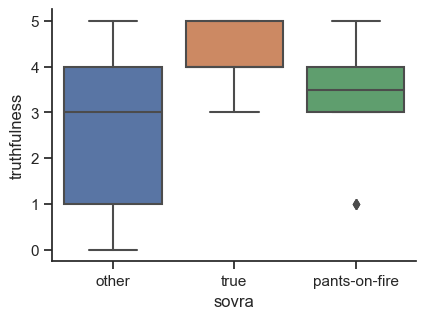

In [105]:
sns.boxplot(x="sovra", y="truthfulness", data=df[df["parola"] == "tax"])

<Axes: xlabel='sovra', ylabel='truthfulness'>

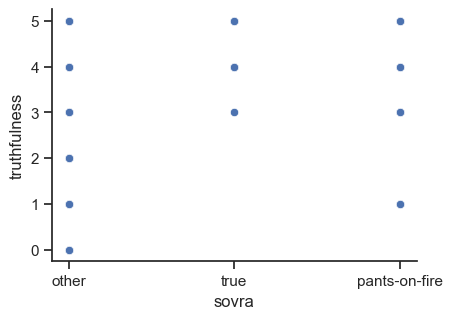

In [106]:
sns.scatterplot(x="sovra", y="truthfulness", data=df[df["parola"] == "tax"])

In [107]:
freq_parole_df.sort_values("truthfulness_all",ascending=False)

,pants-on-fire,other,true,wrong_false,other_false,correct_false,wrong_true,other_true,correct_true,truthfulness_all,truthfulness_true,truthfulness_false
homicide,0,0,1,0,0,0,0,0,1,4.5,4.5,NaN
white,0,0,1,0,0,0,0,0,1,4.5,4.5,NaN
Black,0,0,1,0,0,0,0,0,1,4.5,4.5,NaN
Presidential,0,1,0,0,0,0,0,0,0,4.5,NaN,NaN
objected,0,1,0,0,0,0,0,0,0,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Core,1,0,0,1,0,0,0,0,0,0.7,NaN,0.7
homosexual,1,0,0,1,0,0,0,0,0,0.7,NaN,0.7
possibly,1,0,0,1,0,0,0,0,0,0.7,NaN,0.7
can,1,0,0,1,0,0,0,0,0,0.7,NaN,0.7


aggiungo frequenza

In [108]:
freq_parole_df["freq_all"] = 0
freq_parole_df["stopword"] = 0

stopwords_eng = stopwords.words('english')

for index, row in freq_parole_df.iterrows():
    freq_parole_df.loc[index,"freq_all"] = row["true"] + row["pants-on-fire"] + row["other"]
    if index in stopwords_eng:
        freq_parole_df.loc[index,"stopword"] = True
    else:
        freq_parole_df.loc[index,"stopword"] = False
        

In [109]:
parole_interessanti = freq_parole_df[(freq_parole_df["stopword"]==False) & (freq_parole_df["freq_all"]>=5)].sort_values("freq_all",ascending=False)
parole_interessanti.head(5)

,pants-on-fire,other,true,wrong_false,other_false,correct_false,wrong_true,other_true,correct_true,truthfulness_all,truthfulness_true,truthfulness_false,freq_all,stopword
,11,46,12,1,9,1,1,7,4,2.717613,3.866667,1.775701,69,False
The,3,12,4,1,2,0,1,1,2,2.747368,3.775000,1.633333,19,False
Says,5,7,1,2,0,3,0,1,0,2.500000,3.800000,2.440000,13,False
people,2,8,2,0,1,1,0,0,2,3.066667,4.500000,2.550000,12,False
tax,3,6,1,0,0,3,0,0,1,3.160000,4.300000,3.500000,10,False


In [110]:
df1 = []
for index, row in parole_interessanti.iterrows():
    for sovra in ["pants-on-fire","other","true"]:
            df1.append([index,sovra,row[sovra]])
df1 = pd.DataFrame(df1,columns=["parola","sovra","freq"])

In [111]:
df1.drop(df1.loc[df1['parola']==""].index, inplace=True)


In [112]:
df1

,parola,sovra,freq
3,The,pants-on-fire,3
4,The,other,12
5,The,true,4
6,Says,pants-on-fire,5
7,Says,other,7
...,...,...,...
76,majority,other,1
77,majority,true,4
78,new,pants-on-fire,0
79,new,other,2


<Axes: xlabel='parola', ylabel='freq'>

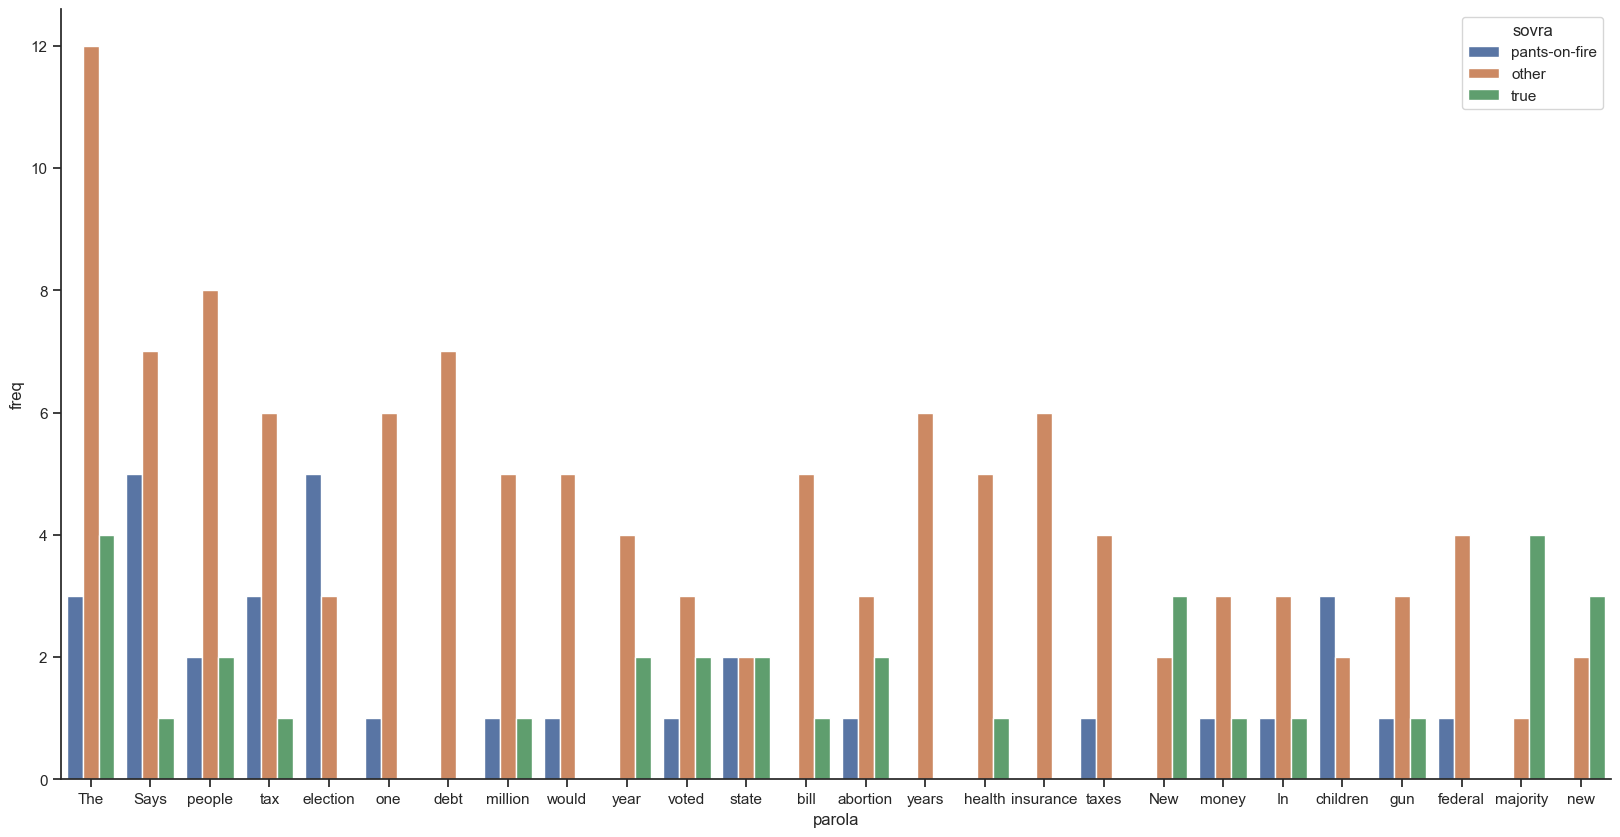

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x="parola", y="freq",hue = "sovra", data=df1)

In [114]:
df = []
for index, row in parole_interessanti.iterrows():
    for freq in ["truthfulness_all","truthfulness_true","truthfulness_false"]:
        if freq == "truthfulness_true":
            df.append([index,freq,row[freq],row["true"]])
        else:
            df.append([index,freq,row[freq],row["pants-on-fire"]])

In [115]:
df = pd.DataFrame(df,columns=["parola","freq","truthfulness","sovra"])

In [116]:
df.head(10)

,parola,freq,truthfulness,sovra
0,,truthfulness_all,2.717613,11
1,,truthfulness_true,3.866667,12
2,,truthfulness_false,1.775701,11
3,The,truthfulness_all,2.747368,3
4,The,truthfulness_true,3.775000,4
5,The,truthfulness_false,1.633333,3
6,Says,truthfulness_all,2.500000,5
7,Says,truthfulness_true,3.800000,1
8,Says,truthfulness_false,2.440000,5
9,people,truthfulness_all,3.066667,2


<Axes: xlabel='parola', ylabel='truthfulness'>

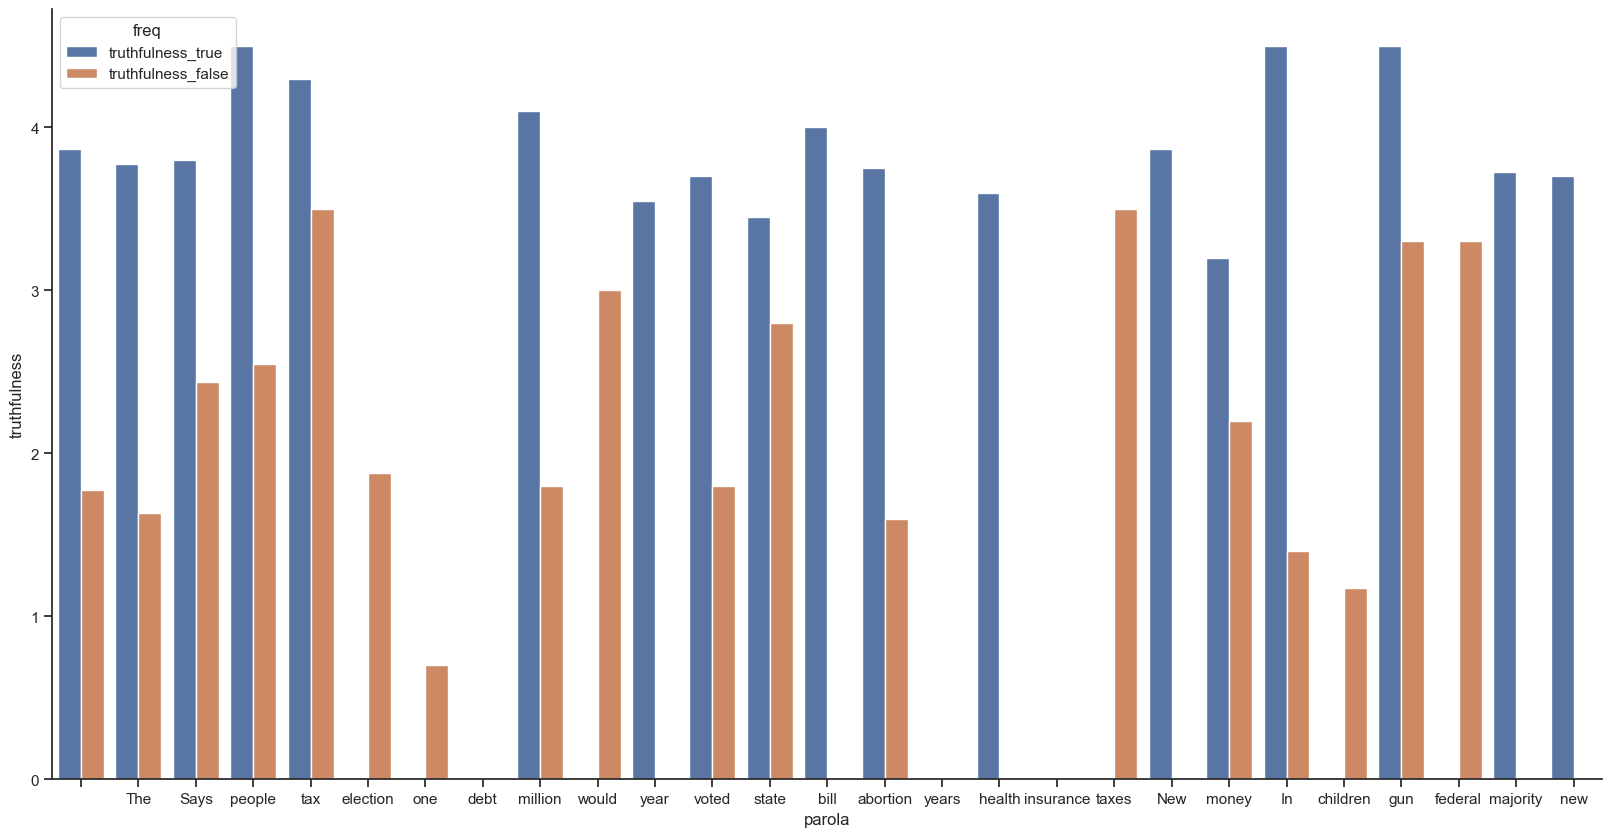

In [117]:
plt.figure(figsize=(20,10))
sns.barplot(x="parola", y="truthfulness",hue = "freq", data=df[df["freq"] != "truthfulness_all"])

In [118]:
sub = df_all_dropped[df_all_dropped["doc_fact_check_ground_truth_label"] == sovra]

In [119]:
visualizza_dataframe(df_all_dropped,5)

,doc_index,doc_id,doc_fact_check_ground_truth_label,doc_fact_check_ground_truth_value,doc_speaker_party,doc_statement_date,doc_statement_text,quartile,mean,sovra,numero_parole_frase,numero_parole_significative,percentuale_parole_significative,fre,upper_fre,sentiment,subjectivity,sentiment_label,subjectivity_label
29,5.0,democrats-say-david-jolly-david-jolly-supports...,barely-true,2.0,DEM,07,"Says David Jolly ""supports privatizing Social ...",other,2.9,other,7,7,1.000000,5.15,30,0.033333,0.066667,positive,bassa
0,6.0,joni-ernst-target-describing-11th-hour-obama-r...,mostly-true,4.0,DEM,03,"The Obama administration issued an ""11th-hour ...",other,3.4,other,16,12,0.750000,12.94,30,0.000000,0.000000,neutral,bassa
76,2.0,yes-its-true-cannabis-reform-supported-wiscons...,true,5.0,DEM,04,"Cannabis reform ""is supported by the majority ...",other_true,3.9,true,18,10,0.555556,27.83,30,0.000000,0.000000,neutral,bassa
34,3.0,fact-checking-whether-bennie-thompson-objected...,mostly-true,4.0,REP,06,âBennie Thompson objected to the 2004 Presid...,other,4.5,other,8,6,0.750000,29.52,30,0.000000,0.000000,neutral,bassa
10,3.0,yes-tax-break-ron-johnson-pushed-2017-has-bene...,true,5.0,DEM,04,"""The tax carve out (Ron) Johnson spearheaded o...",correct_true,4.3,true,14,11,0.785714,31.89,60,0.125000,0.700000,positive,media-alta


In [120]:
df_all_dropped[["doc_statement_text","sentiment"]]

,doc_statement_text,sentiment
29,"Says David Jolly ""supports privatizing Social ...",0.033333
0,"The Obama administration issued an ""11th-hour ...",0.000000
76,"Cannabis reform ""is supported by the majority ...",0.000000
34,âBennie Thompson objected to the 2004 Presid...,0.000000
10,"""The tax carve out (Ron) Johnson spearheaded o...",0.125000
...,...,...
118,"Since taking office, Hochul has passed more th...",0.318182
204,"""Rick Scott has paid down our debt by about $2...",-0.155556
125,"""When we passed the assault weapons ban, mass ...",-0.155556
7,The 2020 election âwas stolen from Donald J....,0.000000


In [121]:
parole_interessanti.index

Index(['', 'The', 'Says', 'people', 'tax', 'election', 'one', 'debt',
       'million', 'would', 'year', 'voted', 'state', 'bill', 'abortion',
       'years', 'health', 'insurance', 'taxes', 'New', 'money', 'In',
       'children', 'gun', 'federal', 'majority', 'new'],
      dtype='object')

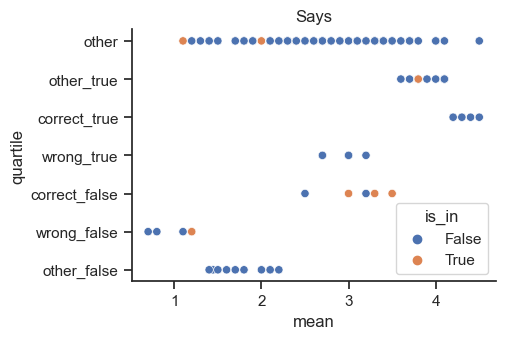

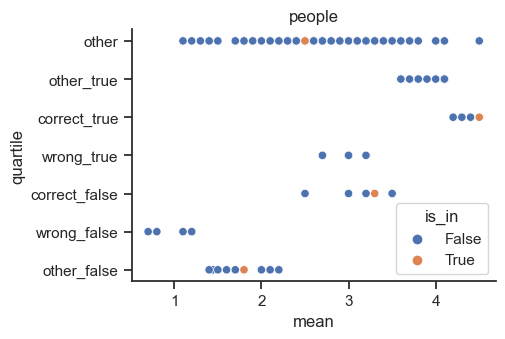

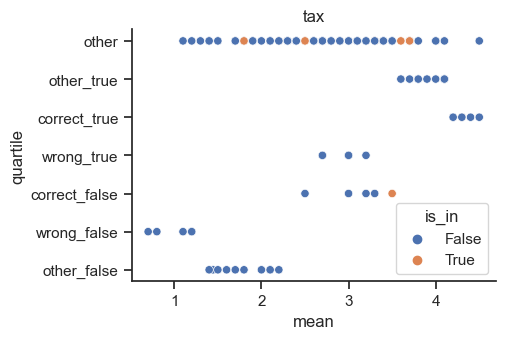

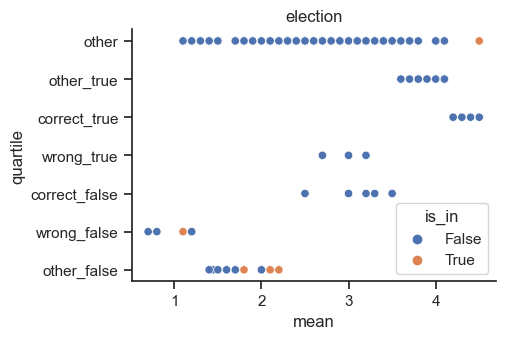

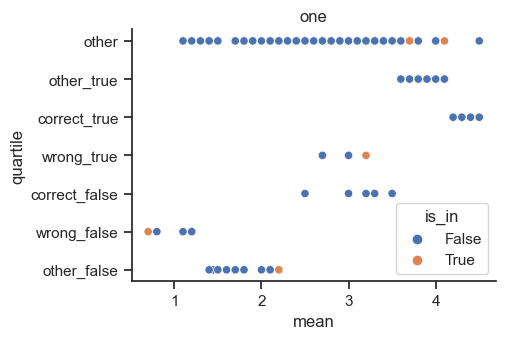

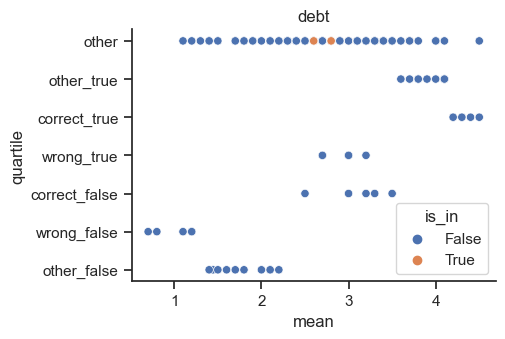

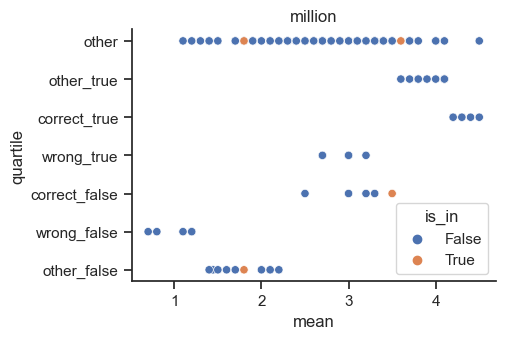

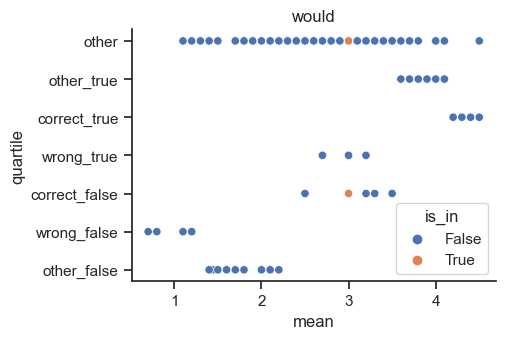

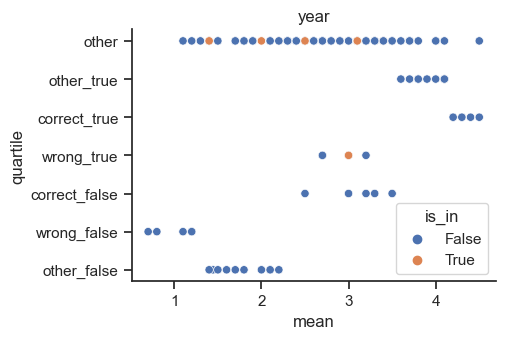

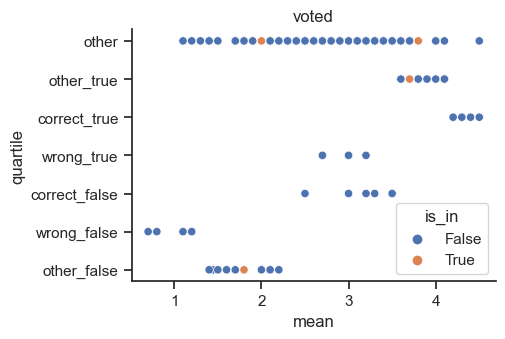

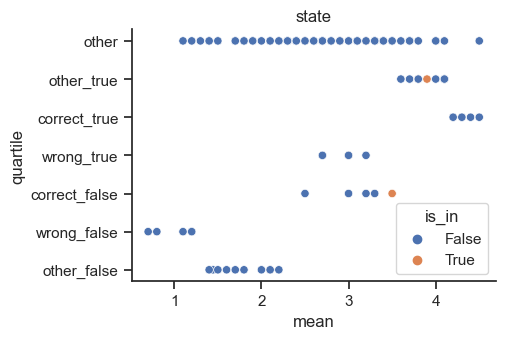

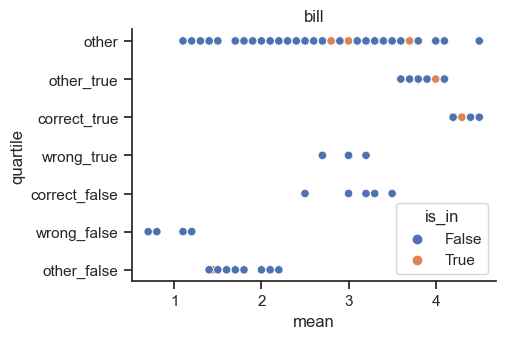

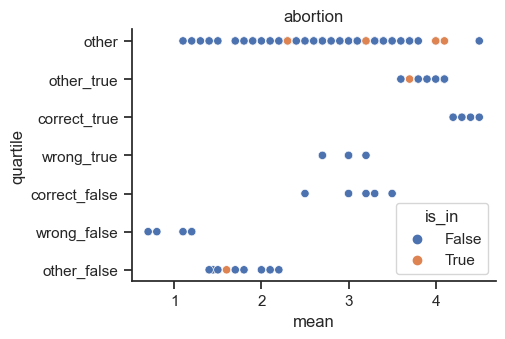

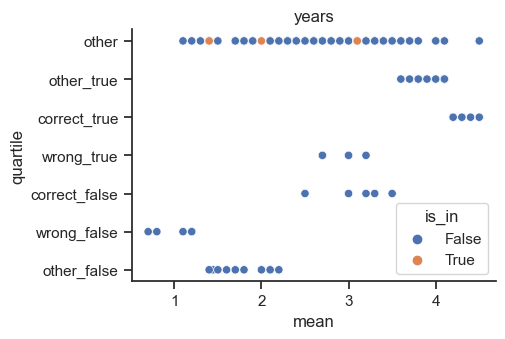

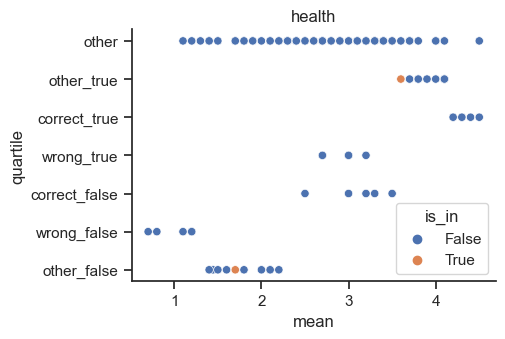

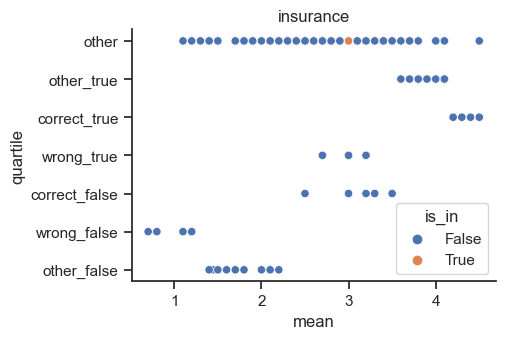

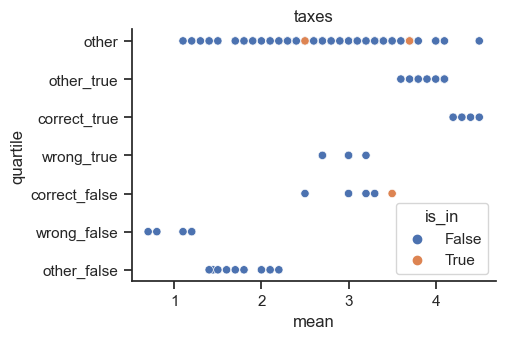

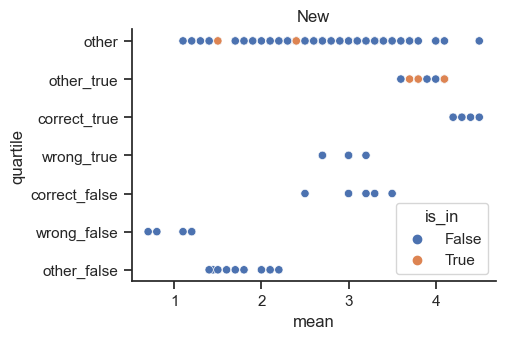

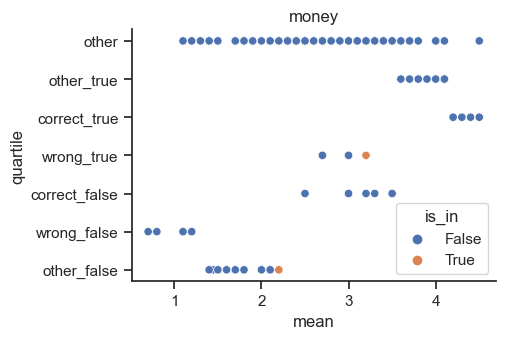

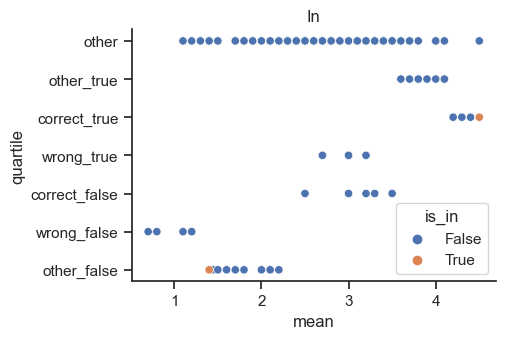

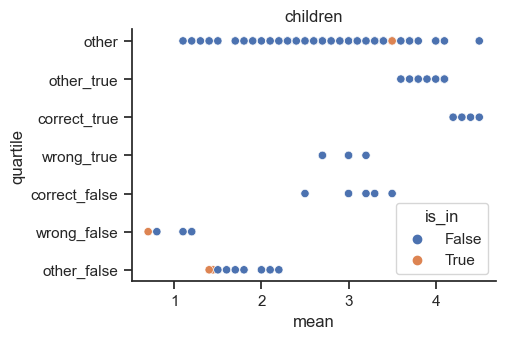

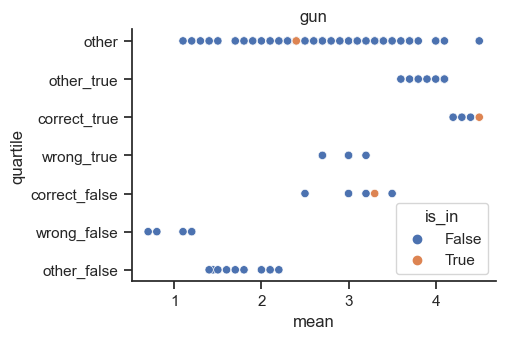

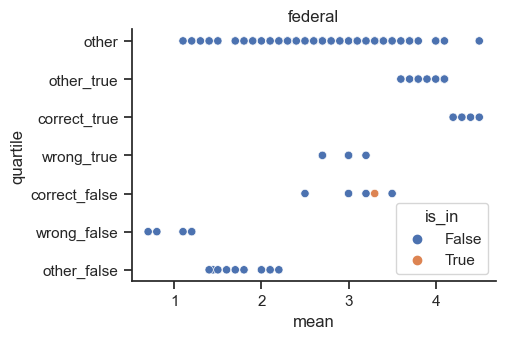

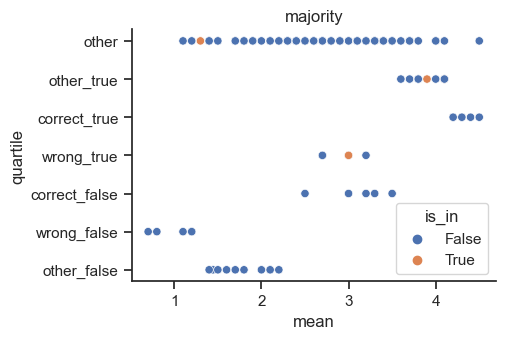

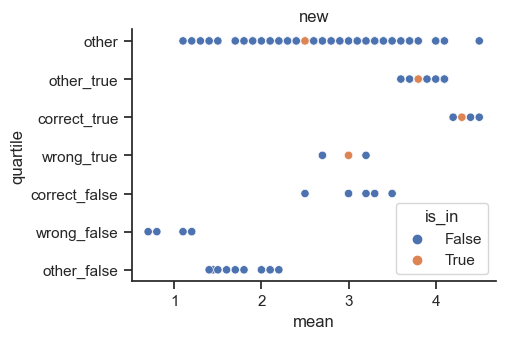

In [122]:
for word in parole_interessanti.index:

    if word != "" and word != "The":
        sub = df_all_dropped
        #sub = df_all_dropped[df_all_dropped["sovra"] != "other"]
        sub["is_in"] = False

        for row in sub.iterrows():
            if word in row[1]["doc_statement_text"]:
                sub.loc[row[0],"is_in"] = True
                
        sns.scatterplot(x="mean", 
                        y="quartile", 
                        hue = "is_in",
                        data = sub
                        )
        plt.title(word)
        plt.show()

In [123]:
visualizza_dataframe(sub,5)

,doc_index,doc_id,doc_fact_check_ground_truth_label,doc_fact_check_ground_truth_value,doc_speaker_party,doc_statement_date,doc_statement_text,quartile,mean,sovra,numero_parole_frase,numero_parole_significative,percentuale_parole_significative,fre,upper_fre,sentiment,subjectivity,sentiment_label,subjectivity_label,is_in
29,5.0,democrats-say-david-jolly-david-jolly-supports...,barely-true,2.0,DEM,07,"Says David Jolly ""supports privatizing Social ...",other,2.9,other,7,7,1.000000,5.15,30,0.033333,0.066667,positive,bassa,False
0,6.0,joni-ernst-target-describing-11th-hour-obama-r...,mostly-true,4.0,DEM,03,"The Obama administration issued an ""11th-hour ...",other,3.4,other,16,12,0.750000,12.94,30,0.000000,0.000000,neutral,bassa,False
76,2.0,yes-its-true-cannabis-reform-supported-wiscons...,true,5.0,DEM,04,"Cannabis reform ""is supported by the majority ...",other_true,3.9,true,18,10,0.555556,27.83,30,0.000000,0.000000,neutral,bassa,False
34,3.0,fact-checking-whether-bennie-thompson-objected...,mostly-true,4.0,REP,06,âBennie Thompson objected to the 2004 Presid...,other,4.5,other,8,6,0.750000,29.52,30,0.000000,0.000000,neutral,bassa,False
10,3.0,yes-tax-break-ron-johnson-pushed-2017-has-bene...,true,5.0,DEM,04,"""The tax carve out (Ron) Johnson spearheaded o...",correct_true,4.3,true,14,11,0.785714,31.89,60,0.125000,0.700000,positive,media-alta,False
